In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

### Load the saved model

In [60]:
model = tf.keras.models.load_model('cat_dog_classifier.h5')

### Path to the test dataset

In [61]:
test_path = 'dataset/test'

### Image Data Augmentation for test set

In [62]:
test_datagen = image.ImageDataGenerator(rescale=1./255)

### Generate batches of augmented data for testing

In [63]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 62 images belonging to 2 classes.


### Evaluate the model on the test set

In [64]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 72ms/step - loss: 0.6530 - accuracy: 0.7258
Test Accuracy: 72.58%


### Predictions

In [65]:
# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to binary (0 or 1)
binary_predictions = np.round(predictions).flatten()

# Get true labels
true_labels = test_generator.classes

2/2 [==============================] - 0s 52ms/step


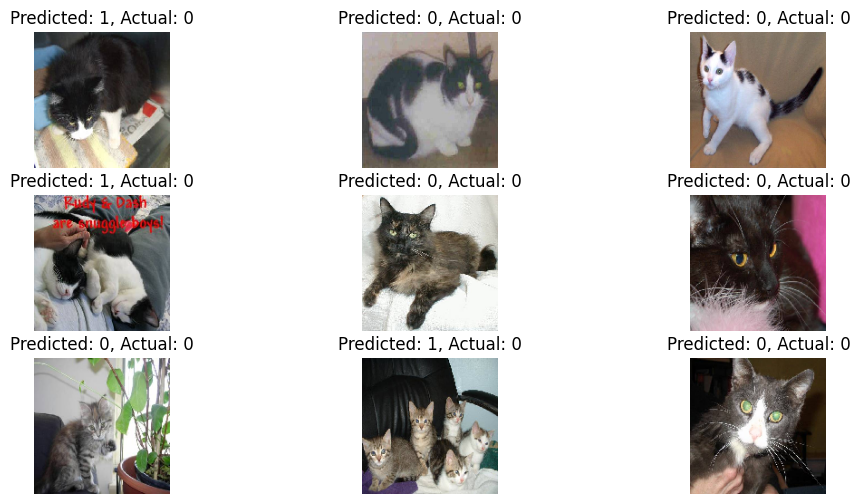

In [68]:
# Plot a few example predictions
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img_path = test_generator.filepaths[i]
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f'Predicted: {int(binary_predictions[i])}, Actual: {true_labels[i]}')
    plt.axis('off')

plt.show()

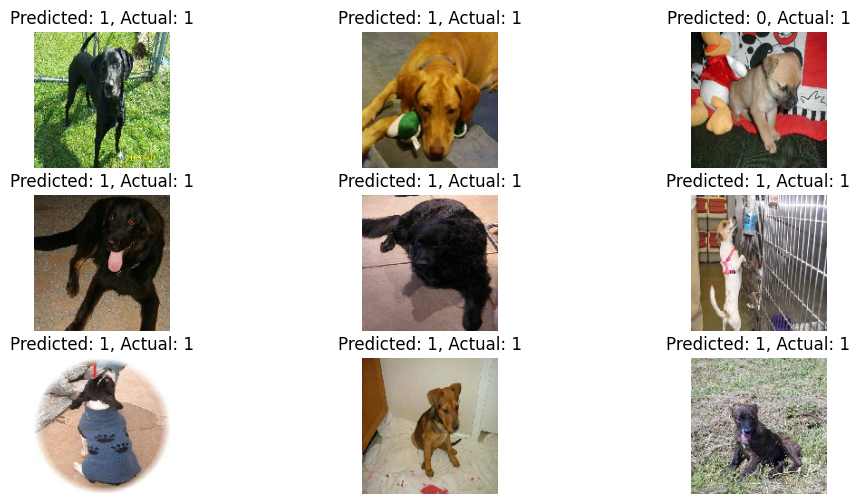

In [67]:
# Plot a few example predictions
plt.figure(figsize=(12, 6))
num_examples = 9
for i in range(-num_examples, 0):
    plt.subplot(3, 3, i + num_examples + 1)
    img_path = test_generator.filepaths[i]
    img = image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.title(f'Predicted: {int(binary_predictions[i])}, Actual: {true_labels[i]}')
    plt.axis('off')

plt.show()